Some of the code in this lab was copied from the solution at https://github.com/learn-co-curriculum/dsc-modeling-your-data-lab/tree/solution

# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Remove predictors with p-values too high and refit the model
* Examine and interpret the model results
* Split data into training and testing sets
* Fit a regression model to the data set using statsmodel library


## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)" then you need to further preprocess your column names.**

In [33]:
# this cell of code copied from https://github.com/learn-co-curriculum/dsc-modeling-your-data-lab/tree/solution
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [34]:
# this cell of code copied from https://github.com/learn-co-curriculum/dsc-modeling-your-data-lab/tree/solution
df = pd.read_csv('Lego_dataset_cleaned.csv')

In [35]:
for col in df.columns:
    print(col)

piece_count
list_price
num_reviews
play_star_rating
star_rating
val_star_rating
ages_10+
ages_10-14
ages_10-16
ages_10-21
ages_11-16
ages_12+
ages_12-16
ages_14+
ages_16+
ages_1½-3
ages_1½-5
ages_2-5
ages_4+
ages_4-7
ages_4-99
ages_5+
ages_5-12
ages_5-8
ages_6+
ages_6-12
ages_6-14
ages_7+
ages_7-12
ages_7-14
ages_8+
ages_8-12
ages_8-14
ages_9+
ages_9-12
ages_9-14
ages_9-16
theme_name_Angry Birds™
theme_name_Architecture
theme_name_BOOST
theme_name_Blue's Helicopter Pursuit
theme_name_BrickHeadz
theme_name_Carnotaurus Gyrosphere Escape
theme_name_City
theme_name_Classic
theme_name_Creator 3-in-1
theme_name_Creator Expert
theme_name_DC Comics™ Super Heroes
theme_name_DC Super Hero Girls
theme_name_DIMENSIONS™
theme_name_DUPLO®
theme_name_Dilophosaurus Outpost Attack
theme_name_Disney™
theme_name_Elves
theme_name_Friends
theme_name_Ghostbusters™
theme_name_Ideas
theme_name_Indoraptor Rampage at Lockwood Estate
theme_name_Juniors
theme_name_Jurassic Park Velociraptor Chase
theme_name_MINDS

In [36]:
df.columns = [col.replace('+','') for col in df.columns]
df.columns = [col.replace('-','') for col in df.columns]
df.columns = [col.replace(' ','') for col in df.columns]
df.columns = [col.replace('™','') for col in df.columns]
df.columns = [col.replace('®','') for col in df.columns]
df.columns = [col.replace("'",'') for col in df.columns]
df.columns = [col.replace('½','') for col in df.columns]
df.columns = [col.replace('.','') for col in df.columns]

In [37]:
# this cell of code copied from https://github.com/learn-co-curriculum/dsc-modeling-your-data-lab/tree/solution
outcome = 'list_price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [38]:
# this cell of code copied from https://github.com/learn-co-curriculum/dsc-modeling-your-data-lab/tree/solution
train, test = train_test_split(df)

In [39]:
# this cell of code copied from https://github.com/learn-co-curriculum/dsc-modeling-your-data-lab/tree/solution
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     556.3
Date:                Fri, 25 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:29:59   Log-Likelihood:                -40576.
No. Observations:                8152   AIC:                         8.134e+04
Df Residuals:                    8057   BIC:                         8.201e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       63.8921      1.862     34.313      0.000      60.242      67.542
piece_count                                     75.9507      0.905     83.959      0.000      74.177      77.724
num_reviews                                      6.3321      0.679      9.329      0.000       5.002       7.663
play_star_rating                                 5.1000      0.633      8.056      0.000       3.859       6.341
star_rating                                     -1.9015      0.719     -2.645      0.008      -3.311      -0.492
val_star_rating                                 -8.1498      0.633    -12.884      0.000      -9.390      -6.910
ages_10                                        124.5605      6.910     18.027      0.000     111.016     138.105
ages_1014                                      -24.7094      8.568     -2.884      0.004     -41.505      -7.914
ages_1016                                      -13.9773      4.067     -3.437      0.001     -21.949      -6.005
ages_1021                                       57.2014      7.610      7.517      0.000      42.284      72.119
ages_1116                                      -20.2955      6.027     -3.367      0.001     -32.110      -8.481
ages_12                                         69.8117      5.878     11.877      0.000      58.289      81.334
ages_1216                                      -56.5617      6.900     -8.197      0.000     -70.088     -43.035
ages_14                                         26.3980      4.170      6.330      0.000      18.224      34.572
ages_16                                         36.1945      6.229      5.811      0.000      23.984      48.405
ages_13                                         -9.7303      2.417     -4.025      0.000     -14.469      -4.992
ages_15                                         -3.7155      2.968     -1.252      0.211      -9.534       2.103
ages_25                                         15.1987      1.699      8.947      0.000      11.869      18.529
ages_4                                         -18.0054      6.198     -2.905      0.004     -30.155      -5.856
ages_47                                         -6.3072      3.450     -1.828      0.068     -13.070       0.456
ages_499                                        -3.5892      3.560     -1.008      0.313     -10.567       3.388
ages_5                                          -9.2962      3.181     -2.923      0.003     -15.531      -3.061
ages_512                                       -35.5506      3.281    -10.835      0.000     -41.982     -29.119
ages_58                                          6.6208      6.242      1.061      0.289      -5.614      18.856
ages_6                          

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [40]:
# this cell of code copied from https://github.com/learn-co-curriculum/dsc-modeling-your-data-lab/tree/solution
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] <0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

103 74
['piece_count', 'num_reviews', 'play_star_rating', 'star_rating', 'val_star_rating']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,63.8921,1.862,34.313,0.000,60.242,67.542
piece_count,75.9507,0.905,83.959,0.000,74.177,77.724
num_reviews,6.3321,0.679,9.329,0.000,5.002,7.663
play_star_rating,5.1000,0.633,8.056,0.000,3.859,6.341
star_rating,-1.9015,0.719,-2.645,0.008,-3.311,-0.492


In [41]:
# this cell of code copied from https://github.com/learn-co-curriculum/dsc-modeling-your-data-lab/tree/solution
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     716.5
Date:                Fri, 25 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:29:59   Log-Likelihood:                -40584.
No. Observations:                8152   AIC:                         8.132e+04
Df Residuals:                    8078   BIC:                         8.183e+04
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       63.9356      1.633     39.162      0.000      60.735      67.136
piece_count                                     75.9748      0.890     85.391      0.000      74.231      77.719
num_reviews                                      6.4316      0.673      9.564      0.000       5.113       7.750
play_star_rating                                 5.2145      0.620      8.413      0.000       4.000       6.430
star_rating                                     -1.8449      0.705     -2.618      0.009      -3.226      -0.464
val_star_rating                                 -8.1624      0.603    -13.530      0.000      -9.345      -6.980
ages_10                                        130.7397      7.732     16.908      0.000     115.582     145.897
ages_1014                                      -19.1979      8.851     -2.169      0.030     -36.549      -1.847
ages_1016                                       -8.7099      3.827     -2.276      0.023     -16.211      -1.209
ages_1021                                       63.7311      8.232      7.742      0.000      47.593      79.869
ages_1116                                      -15.2323      5.823     -2.616      0.009     -26.647      -3.818
ages_12                                         75.3523      6.768     11.133      0.000      62.085      88.620
ages_1216                                      -51.2366      7.213     -7.103      0.000     -65.376     -37.097
ages_14                                         31.6376      4.762      6.644      0.000      22.303      40.972
ages_16                                         41.0222      6.934      5.916      0.000      27.429      54.615
ages_13                                         -2.7354      3.113     -0.879      0.380      -8.839       3.368
ages_25                                         21.7215      2.012     10.798      0.000      17.778      25.665
ages_4                                         -15.2478      9.494     -1.606      0.108     -33.858       3.362
ages_5                                          -7.2617      3.118     -2.329      0.020     -13.374      -1.149
ages_512                                       -29.8595      2.717    -10.989      0.000     -35.186     -24.533
ages_6                                         -22.2091      5.827     -3.811      0.000     -33.631     -10.787
ages_612                                       -16.9851      1.914     -8.875      0.000     -20.737     -13.233
ages_712                                       -15.6774      2.255     -6.953      0.000     -20.098     -11.257
ages_714                                       -11.7783      1.998     -5.895      0.000     -15.695      -7.862
ages_8                          

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [42]:
# this cell of code copied from https://github.com/learn-co-curriculum/dsc-modeling-your-data-lab/tree/solution
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] <0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

75 64
['piece_count', 'num_reviews', 'play_star_rating', 'star_rating', 'val_star_rating']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,63.9356,1.633,39.162,0.000,60.735,67.136
piece_count,75.9748,0.890,85.391,0.000,74.231,77.719
num_reviews,6.4316,0.673,9.564,0.000,5.113,7.750
play_star_rating,5.2145,0.620,8.413,0.000,4.000,6.430
star_rating,-1.8449,0.705,-2.618,0.009,-3.226,-0.464


In [43]:
# this cell of code copied from https://github.com/learn-co-curriculum/dsc-modeling-your-data-lab/tree/solution
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     829.0
Date:                Fri, 25 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:29:59   Log-Likelihood:                -40594.
No. Observations:                8152   AIC:                         8.132e+04
Df Residuals:                    8088   BIC:                         8.176e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       63.8222      1.260     50.633      0.000      61.351      66.293
piece_count                                     75.6490      0.863     87.631      0.000      73.957      77.341
num_reviews                                      5.9078      0.622      9.496      0.000       4.688       7.127
play_star_rating                                 5.4325      0.614      8.841      0.000       4.228       6.637
star_rating                                     -1.9195      0.699     -2.748      0.006      -3.289      -0.550
val_star_rating                                 -8.1741      0.601    -13.598      0.000      -9.352      -6.996
ages_10                                        133.4235      7.588     17.584      0.000     118.550     148.297
ages_1014                                      -15.7016      8.679     -1.809      0.070     -32.716       1.312
ages_1016                                       -5.6241      3.565     -1.578      0.115     -12.612       1.364
ages_1021                                       65.0391      8.194      7.937      0.000      48.977      81.102
ages_1116                                      -11.9058      5.621     -2.118      0.034     -22.924      -0.887
ages_12                                         79.5617      6.513     12.216      0.000      66.795      92.329
ages_1216                                      -46.7383      6.969     -6.707      0.000     -60.399     -33.078
ages_14                                         38.7254      4.023      9.625      0.000      30.839      46.612
ages_16                                         47.9101      6.377      7.513      0.000      35.409      60.411
ages_25                                         22.9582      1.864     12.316      0.000      19.304      26.612
ages_5                                          -6.7997      3.088     -2.202      0.028     -12.852      -0.747
ages_512                                       -27.9928      2.594    -10.791      0.000     -33.078     -22.908
ages_6                                         -20.2347      5.753     -3.517      0.000     -31.512      -8.958
ages_612                                       -14.5436      1.617     -8.994      0.000     -17.713     -11.374
ages_712                                       -13.5271      2.000     -6.763      0.000     -17.448      -9.606
ages_714                                        -9.6392      1.733     -5.562      0.000     -13.036      -6.242
ages_8                                          20.0673      4.962      4.044      0.000      10.340      29.795
ages_812                                       -13.3500      2.562     -5.212      0.000     -18.371      -8.329
ages_814                        

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extend of this problem.

In [44]:
#Your code here - Code a way to identify multicollinearity
# this cell of code copied from https://github.com/learn-co-curriculum/dsc-modeling-your-data-lab/tree/solution
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('piece_count', 4.485632924255562),
 ('num_reviews', 2.526137593894973),
 ('play_star_rating', 2.434552133119057),
 ('star_rating', 3.171755203852433),
 ('val_star_rating', 2.407294638269584),
 ('ages_10', 17.617411207965937),
 ('ages_1014', 1.0756726288637886),
 ('ages_1016', 1.1263598692246737),
 ('ages_1021', 7.164804994452671),
 ('ages_1116', 1.1336231347250376),
 ('ages_12', 6.964712674888302),
 ('ages_1216', 1.1683870536573462),
 ('ages_14', 1.7740204455841868),
 ('ages_16', 8.832267592064472),
 ('ages_25', 1.1907189641927598),
 ('ages_5', inf),
 ('ages_512', 3.2264049415050224),
 ('ages_6', 2.664526634319386),
 ('ages_612', 1.788969569214615),
 ('ages_712', 1.4172173394713725),
 ('ages_714', 1.8215841387576748),
 ('ages_8', 3.330071762839874),
 ('ages_812', 1.2232154584713835),
 ('ages_814', 1.6278677836524327),
 ('ages_9', 1.5480319290291487),
 ('ages_912', 1.017434399166702),
 ('theme_name_Architecture', 5.882200504166233),
 ('theme_name_BOOST', 1.0651484078902513),
 ('theme_

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [45]:
# this cell of code copied from https://github.com/learn-co-curriculum/dsc-modeling-your-data-lab/tree/solution
#Your code here - Subset features based on multicollinearity
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x, vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

64 55


In [46]:
# this cell of code copied from https://github.com/learn-co-curriculum/dsc-modeling-your-data-lab/tree/solution
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     838.1
Date:                Fri, 25 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:30:02   Log-Likelihood:                -41034.
No. Observations:                8152   AIC:                         8.218e+04
Df Residuals:                    8096   BIC:                         8.257e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       70.3794      1.086     64.814      0.000      68.251      72.508
piece_count                                     78.3661      0.691    113.364      0.000      77.011      79.721
num_reviews                                      4.5763      0.612      7.483      0.000       3.378       5.775
play_star_rating                                 7.3408      0.557     13.181      0.000       6.249       8.432
star_rating                                     -2.8078      0.713     -3.938      0.000      -4.205      -1.410
val_star_rating                                 -9.4264      0.625    -15.081      0.000     -10.652      -8.201
ages_1014                                      -28.3875      9.130     -3.109      0.002     -46.285     -10.490
ages_1016                                      -14.2775      3.616     -3.948      0.000     -21.366      -7.189
ages_1116                                      -25.7803      5.684     -4.536      0.000     -36.922     -14.639
ages_1216                                      -61.5679      7.040     -8.745      0.000     -75.369     -47.767
ages_14                                         16.5954      3.629      4.573      0.000       9.482      23.709
ages_25                                         17.6046      1.839      9.573      0.000      14.000      21.209
ages_512                                       -34.2007      2.674    -12.789      0.000     -39.443     -28.958
ages_6                                         -26.9455      6.032     -4.467      0.000     -38.769     -15.122
ages_612                                       -21.5770      1.604    -13.453      0.000     -24.721     -18.433
ages_712                                       -19.9156      2.033     -9.798      0.000     -23.900     -15.931
ages_714                                       -15.8696      1.745     -9.094      0.000     -19.291     -12.449
ages_8                                           1.5013      4.565      0.329      0.742      -7.448      10.450
ages_812                                       -19.5597      2.586     -7.563      0.000     -24.629     -14.490
ages_814                                       -15.0923      1.730     -8.723      0.000     -18.484     -11.701
ages_9                                          22.9451     11.400      2.013      0.044       0.597      45.293
ages_912                                       -30.0916      6.406     -4.697      0.000     -42.649     -17.534
theme_name_BOOST                                86.6356      9.932      8.723      0.000      67.167     106.104
theme_name_BluesHelicopterPursuit               22.5017      8.759      2.569      0.010       5.333      39.671
theme_name_CarnotaurusGyrosphere

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

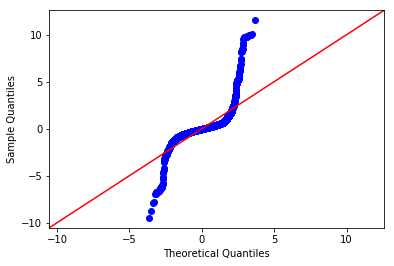

In [47]:
# this cell of code copied from https://github.com/learn-co-curriculum/dsc-modeling-your-data-lab/tree/solution
# - Check that the residuals are normally distributed

fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

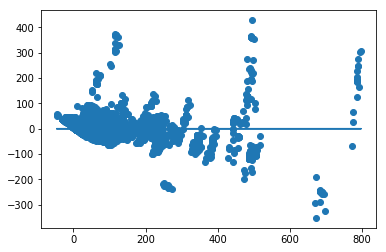

In [48]:
# this cell of code copied from https://github.com/learn-co-curriculum/dsc-modeling-your-data-lab/tree/solution
#Your code here - Check that the residuals are homoscedastic

plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the list_price increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confiding the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least 2 additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

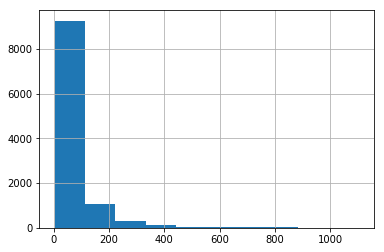

In [49]:
# this cell of code copied from https://github.com/learn-co-curriculum/dsc-modeling-your-data-lab/tree/solution
df.list_price.hist();

In [50]:
# this cell of code copied from https://github.com/learn-co-curriculum/dsc-modeling-your-data-lab/tree/solution
for i in range(80, 100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

0.8 percentile: 90.986
0.81 percentile: 92.66216100000052
0.82 percentile: 97.5878
0.83 percentile: 101.898
0.84 percentile: 109.13971199999885
0.85 percentile: 110.352
0.86 percentile: 119.96492
0.87 percentile: 121.9878
0.88 percentile: 121.9878
0.89 percentile: 134.18779999999998
0.9 percentile: 143.952
0.91 percentile: 153.986
0.92 percentile: 170.7878
0.93 percentile: 182.9878
0.94 percentile: 198.7929
0.95 percentile: 220.03032999999942
0.96 percentile: 251.90543999999994
0.97 percentile: 292.7878
0.98 percentile: 359.88
0.99 percentile: 463.5878


In [51]:
# this cell of code copied from https://github.com/learn-co-curriculum/dsc-modeling-your-data-lab/tree/solution
orig_tot = len(df)
df = df[df.list_price < 450] # removing outliers
print("percent removed: ", (orig_tot-len(df))/orig_tot)
df.list_price = df.list_price.map(np.log) # apply a log transformation
train, test = train_test_split(df)

# refit model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

percent removed:  0.010487580496780129


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     434.6
Date:                Fri, 25 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:30:03   Log-Likelihood:                -5020.9
No. Observations:                8067   AIC:                         1.015e+04
Df Residuals:                    8011   BIC:                         1.055e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        3.4552      0.014    253.658      0.000       3.429       3.482
piece_count                                      0.6142      0.010     59.991      0.000       0.594       0.634
num_reviews                                     -0.0146      0.008     -1.836      0.066      -0.030       0.001
play_star_rating                                 0.1365      0.007     20.196      0.000       0.123       0.150
star_rating                                     -0.0631      0.009     -7.244      0.000      -0.080      -0.046
val_star_rating                                 -0.1256      0.008    -16.156      0.000      -0.141      -0.110
ages_1014                                        0.1642      0.114      1.441      0.149      -0.059       0.387
ages_1016                                        0.4913      0.045     10.820      0.000       0.402       0.580
ages_1116                                        0.2170      0.072      3.027      0.002       0.076       0.358
ages_1216                                       -0.1698      0.086     -1.975      0.048      -0.338      -0.001
ages_14                                          0.3314      0.049      6.759      0.000       0.235       0.428
ages_25                                          0.4145      0.022     18.705      0.000       0.371       0.458
ages_512                                        -0.8319      0.032    -25.788      0.000      -0.895      -0.769
ages_6                                          -0.9814      0.068    -14.474      0.000      -1.114      -0.848
ages_612                                        -0.2590      0.020    -13.249      0.000      -0.297      -0.221
ages_712                                         0.0013      0.025      0.053      0.958      -0.047       0.050
ages_714                                        -0.1051      0.021     -4.952      0.000      -0.147      -0.064
ages_8                                           0.5206      0.057      9.158      0.000       0.409       0.632
ages_812                                         0.1728      0.031      5.517      0.000       0.111       0.234
ages_814                                         0.1835      0.021      8.658      0.000       0.142       0.225
ages_9                                           0.1040      0.123      0.847      0.397      -0.137       0.344
ages_912                                         0.3001      0.080      3.749      0.000       0.143       0.457
theme_name_BOOST                                 0.9868      0.134      7.354      0.000       0.724       1.250
theme_name_BluesHelicopterPursuit                0.7275      0.109      6.666      0.000       0.514       0.941
theme_name_CarnotaurusGyrosphere

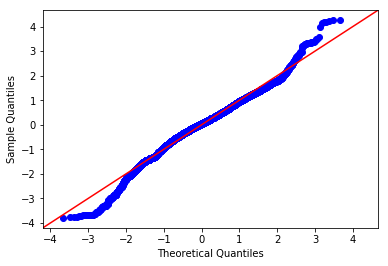

In [52]:
# this cell of code copied from https://github.com/learn-co-curriculum/dsc-modeling-your-data-lab/tree/solution
# - Check that the residuals are normally distributed

fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

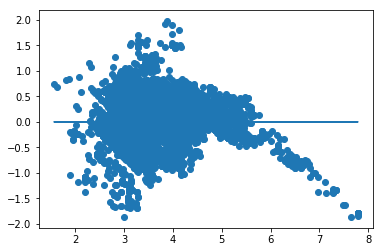

In [59]:
# this cell of code copied from https://github.com/learn-co-curriculum/dsc-modeling-your-data-lab/tree/solution
#- Check that the residuals are homoscedastic

plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

0.8 percentile: 4.447203233446613
0.81 percentile: 4.512971560274537
0.82 percentile: 4.542526402035123
0.83 percentile: 4.580752485605895
0.84 percentile: 4.640913706863106
0.85 percentile: 4.6985494117910225
0.86 percentile: 4.718373863481943
0.87 percentile: 4.787408405976297
0.88 percentile: 4.8039210397329235
0.89 percentile: 4.826327766567244
0.9 percentile: 4.89924031131419
0.91 percentile: 4.976713742220571
0.92 percentile: 5.0490223265009595
0.93 percentile: 5.140421850231899
0.94 percentile: 5.209419483952433
0.95 percentile: 5.292263579298989
0.96 percentile: 5.391752152536553
0.97 percentile: 5.528952783620542
0.98 percentile: 5.678340376637527
0.99 percentile: 5.873347331375852


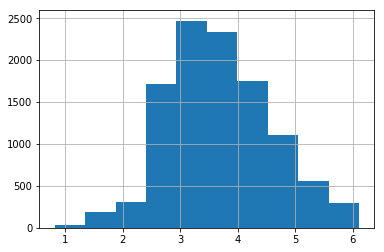

In [55]:
# this cell of code copied from https://github.com/learn-co-curriculum/dsc-modeling-your-data-lab/tree/solution
for i in range(80, 100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))
    
df.list_price.hist();

In [57]:
# this cell of code copied from https://github.com/learn-co-curriculum/dsc-modeling-your-data-lab/tree/solution
df = df[df.list_price <=6]
train, test = train_test_split(df)

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     419.2
Date:                Fri, 25 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:36:29   Log-Likelihood:                -5011.0
No. Observations:                8027   AIC:                         1.013e+04
Df Residuals:                    7971   BIC:                         1.053e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        3.4672      0.014    252.298      0.000       3.440       3.494
piece_count                                      0.6501      0.011     58.536      0.000       0.628       0.672
num_reviews                                     -0.0249      0.008     -3.094      0.002      -0.041      -0.009
play_star_rating                                 0.1380      0.007     20.075      0.000       0.125       0.152
star_rating                                     -0.0605      0.009     -7.032      0.000      -0.077      -0.044
val_star_rating                                 -0.1333      0.008    -17.379      0.000      -0.148      -0.118
ages_1014                                        0.1654      0.114      1.448      0.148      -0.059       0.389
ages_1016                                        0.4820      0.045     10.670      0.000       0.393       0.571
ages_1116                                        0.1660      0.070      2.365      0.018       0.028       0.304
ages_1216                                       -0.1947      0.082     -2.360      0.018      -0.356      -0.033
ages_14                                          0.2688      0.050      5.401      0.000       0.171       0.366
ages_25                                          0.4299      0.022     19.488      0.000       0.387       0.473
ages_512                                        -0.8472      0.033    -26.030      0.000      -0.911      -0.783
ages_6                                          -0.9954      0.069    -14.374      0.000      -1.131      -0.860
ages_612                                        -0.2835      0.020    -14.464      0.000      -0.322      -0.245
ages_712                                        -0.0020      0.025     -0.081      0.935      -0.050       0.046
ages_714                                        -0.1122      0.021     -5.247      0.000      -0.154      -0.070
ages_8                                           0.4884      0.055      8.872      0.000       0.381       0.596
ages_812                                         0.1881      0.032      5.815      0.000       0.125       0.251
ages_814                                         0.1825      0.021      8.639      0.000       0.141       0.224
ages_9                                           0.0995      0.125      0.798      0.425      -0.145       0.344
ages_912                                         0.2838      0.080      3.533      0.000       0.126       0.441
theme_name_BOOST                                 1.0019      0.125      8.015      0.000       0.757       1.247
theme_name_BluesHelicopterPursuit                0.7179      0.123      5.820      0.000       0.476       0.960
theme_name_CarnotaurusGyrosphere

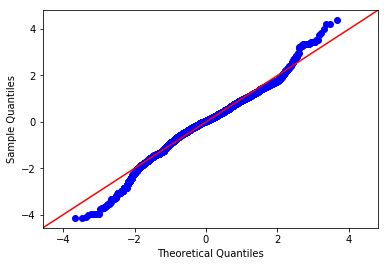

In [58]:
# this cell of code copied from https://github.com/learn-co-curriculum/dsc-modeling-your-data-lab/tree/solution
# - Check that the residuals are normally distributed

fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

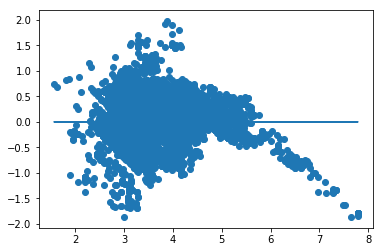

In [60]:
# this cell of code copied from https://github.com/learn-co-curriculum/dsc-modeling-your-data-lab/tree/solution
#- Check that the residuals are homoscedastic

plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches and make ongoing refinements. These choices depend on the context and specific use cases. 